In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
f_data = pd.read_csv("Fraud.csv")
f_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Converting isFraud column into an object data type

f_data['isFraud'] = f_data['isFraud'].astype('object')

In [6]:
f_data.shape

(6362620, 11)

In [7]:
print('Statistical Summary of Numeical Variables')
f_data.describe()

Statistical Summary of Numeical Variables


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [8]:
print('Statistical Summary of Numerical Variables')
f_data.describe(include='object')

Statistical Summary of Numerical Variables


,type,nameOrig,nameDest,isFraud
count,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2
top,CASH_OUT,C1902386530,C1286084959,0
freq,2237500,3,113,6354407


In [9]:
f_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Exploratory Data Analysis

In [10]:
# Trying to understand the Fraud Scenario

f_data[f_data['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

0    6354407
1       8213
Name: isFraud, dtype: int64
0    99.87
1     0.13
Name: isFraud, dtype: float64


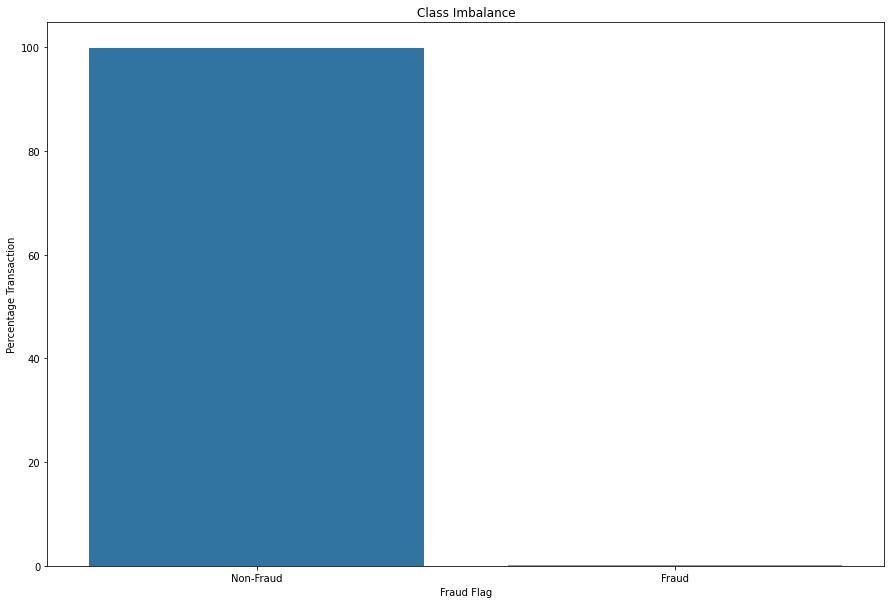

In [12]:
vc_fraud = f_data['isFraud'].value_counts()
print(vc_fraud)

fraud_ratio = round(vc_fraud/len(f_data.index)*100,2)
print(fraud_ratio)

plt.figure(figsize=(15,10))
sns.barplot(x = ['Non-Fraud', 'Fraud'], y = fraud_ratio)
plt.xlabel('Fraud Flag')
plt.ylabel('Percentage Transaction')
plt.title('Class Imbalance')
plt.show()

Their seems to be a huge imbalance in the dataset as there are only 8213 rows i.e. only 0.13% of the data includes fraud cases.
Lets see the relationship between IsFraud and IsFraudFlagged columns

In [13]:
fraud = f_data.loc[f_data.isFraud == 1]
nonfraud = f_data.loc[f_data.isFraud == 0]

In [14]:
print('The total number of fraud transactions is',fraud['isFraud'].count())
print('The total number of Fraud Transactions that has been flagged as Fraud',f_data['isFlaggedFraud'].sum())

The total number of fraud transactions is 8213
The total number of Fraud Transactions that has been flagged as Fraud 16


It can be seen that there have been 8213 fraud cases but only 16 have been flagged as fraud so this column is of no use to us.

In [15]:
f_data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

### Steps in Transaction

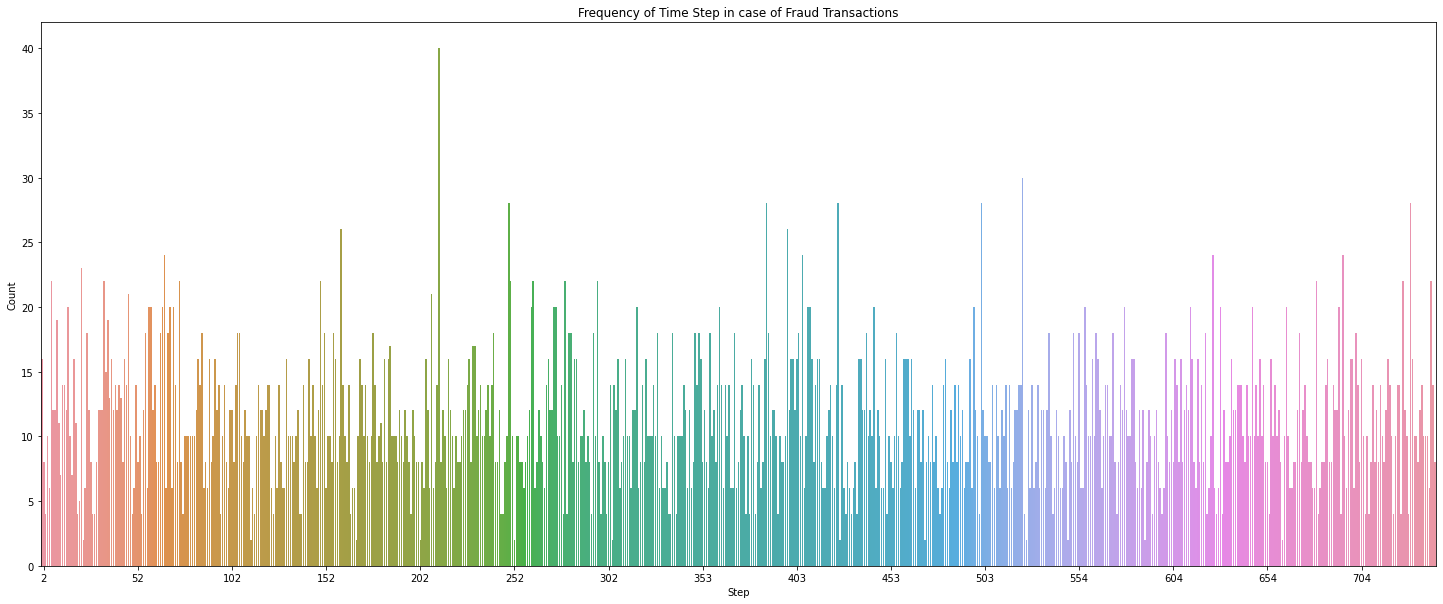

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x=fraud['step'])
plt.xticks(np.arange(min(fraud['step']), max(fraud['step'])+1, 50))
plt.title('Frequency of Time Step in case of Fraud Transactions')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

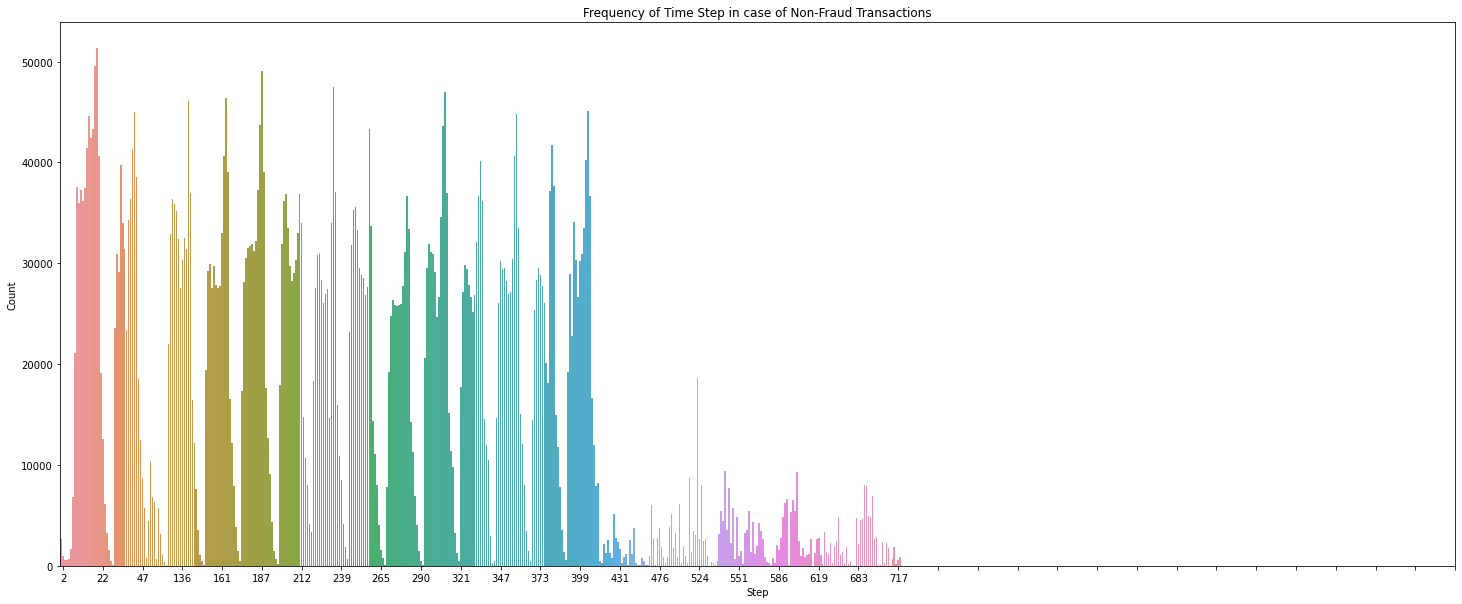

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(x=nonfraud['step'])
plt.xticks(np.arange(min(nonfraud['step']), max(nonfraud['step'])+1, 20))
plt.title('Frequency of Time Step in case of Non-Fraud Transactions')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

**Fraud transactions are uniformly spread out across
time steps, however in non-fraudulent transactions some time steps are less concentrated thus could play an important role during model training.**

### Type of Transactions

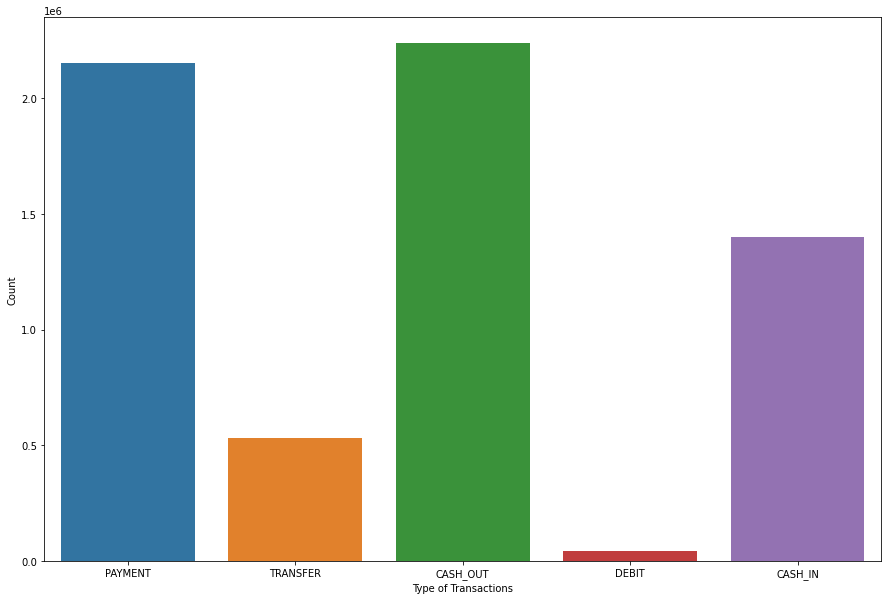

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x=f_data['type'])
plt.xlabel('Type of Transactions')
plt.ylabel('Count')
plt.show()

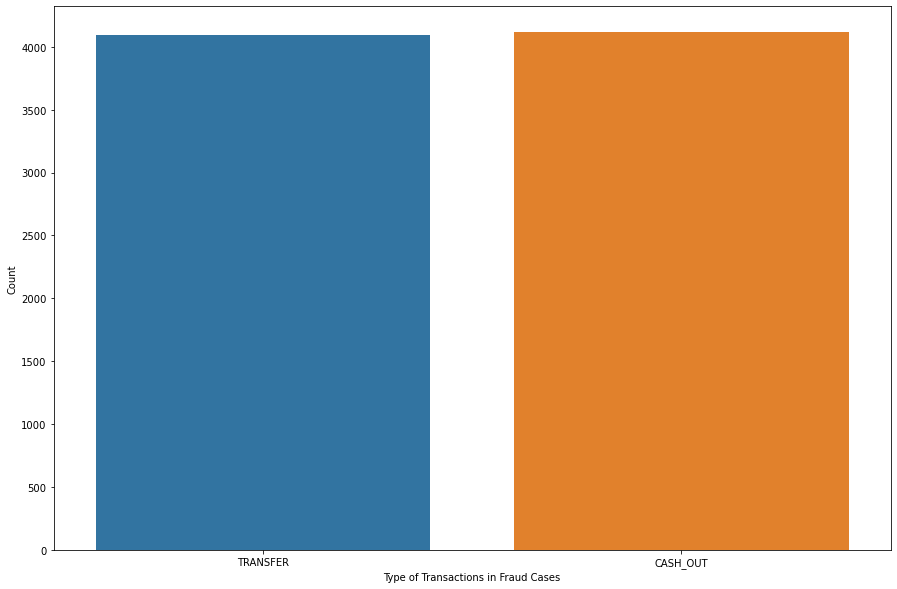

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x=fraud['type'])
plt.xlabel('Type of Transactions in Fraud Cases')
plt.ylabel('Count')
plt.show()

In [20]:
fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

**It can be witnessed that only Transfer and Cashout payment system involve fraud cases so we are going to keep only these transactions in the final dataset.**

In [21]:
f_data = f_data.loc[f_data['type'].isin(['CASH_OUT','TRANSFER']),:]
print('Total number of Transactions present in the current dataset is',len(f_data))

Total number of Transactions present in the current dataset is 2770409


### Amount of Transactions

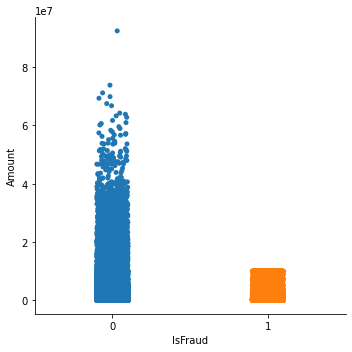

In [22]:
plt.rcParams["figure.figsize"] = (15,5)
sns.catplot(x='isFraud', y='amount',data=f_data)
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

In [23]:
print('Amount lost due to fraud transactions is $',fraud['amount'].sum())

Amount lost due to fraud transactions is $ 12056415427.839998


In [24]:
# Lets check whether there are any negative or zero value in amount

print('Number of transactions where transaction amount is negative:',len(f_data[f_data['amount']<0]))
      
print('Number of transactions where transaction amount is zero:',len(f_data[f_data['amount']==0]))

Number of transactions where transaction amount is negative: 0
Number of transactions where transaction amount is zero: 16


In [25]:
print('Number of transactions where transaction amount is zero:',len(f_data[f_data['amount']>100]))

Number of transactions where transaction amount is zero: 2769608


**Removing transactions where the transaction amount is zero**

### Originator’s balance and Recipient’s balance

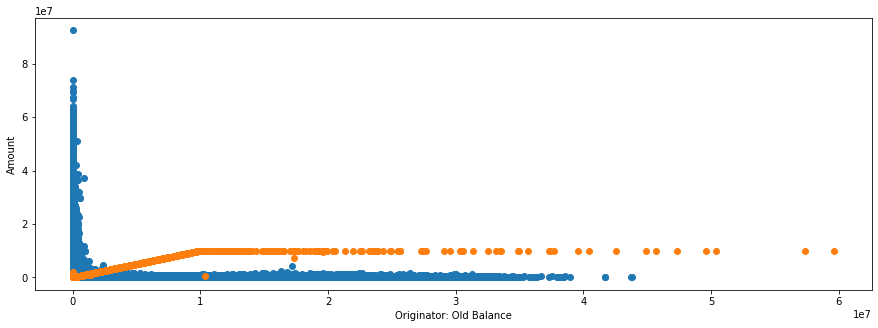

In [26]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'])
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'])
plt.xlabel('Originator: Old Balance')
plt.ylabel('Amount')
plt.show()

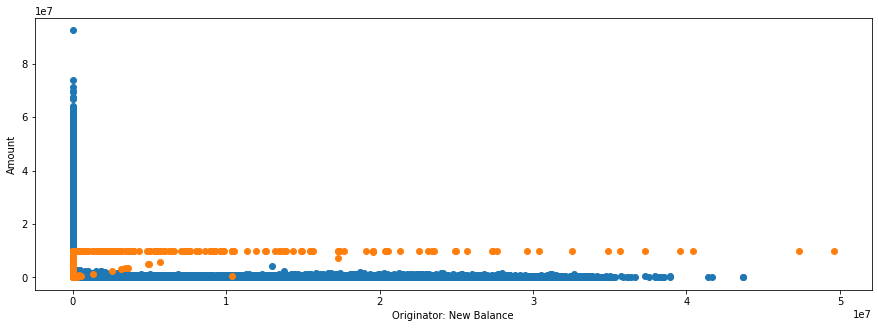

In [27]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['newbalanceOrig'],nonfraud['amount'])
ax.scatter(fraud['newbalanceOrig'],fraud['amount'])
plt.xlabel('Originator: New Balance')
plt.ylabel('Amount')
plt.show()

In [28]:
print('Percent of transactions where initial balance of Originator was zero:',round(len(f_data[f_data['oldbalanceOrg']==0])/len(f_data)*100,2),'%')
print('Percent of transactions where final balance of Recipient was zero:',round(len(f_data[f_data['newbalanceDest']==0])/len(f_data)*100,2),'%')

Percent of transactions where initial balance of Originator was zero: 47.23 %
Percent of transactions where final balance of Recipient was zero: 0.6 %


**In 47% of transactions, the originator's initial balance was recorded
as 0. However, in less than 1% of cases, the recipient's final balance was recorded as 0.**

**Ideally, the originator's final balance should be equal to
originator's initial balance minus the transaction amount and the recipient's final balance should be equal to the recipient's initial balance plus
the transaction amount. Lets check these conditions to see whether the old balance and new balance
variables are captured accurately for both originator and recipient.**

In [29]:
f_data['originator_error'] = f_data['oldbalanceOrg']-f_data['amount']-f_data['newbalanceOrig']
f_data['Recipient_error'] = f_data['oldbalanceDest']+f_data['amount']-f_data['newbalanceDest']

In [30]:
print('Percent of transactions where initial balance of Originator was zero:',round(len(f_data[f_data['originator_error']!=0])/len(f_data)*100,2),'%')
print('Percent of transactions where final balance of Recipient was zero:',round(len(f_data[f_data['Recipient_error']!=0])/len(f_data)*100,2),'%')

Percent of transactions where initial balance of Originator was zero: 93.72 %
Percent of transactions where final balance of Recipient was zero: 42.09 %


****In 93.72 % of the transactions, the originator's final balance is not accurately captured.
Similarly, in 42.09 % of transactions, the recipient's final balance is not accurately captured.****

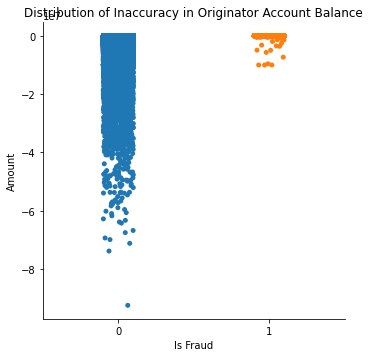

In [31]:
plt.rcParams["figure.figsize"] = (15,5)
sns.catplot(x='isFraud', y='originator_error',data=f_data)
plt.title('Distribution of Inaccuracy in Originator Account Balance')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.title
plt.show()

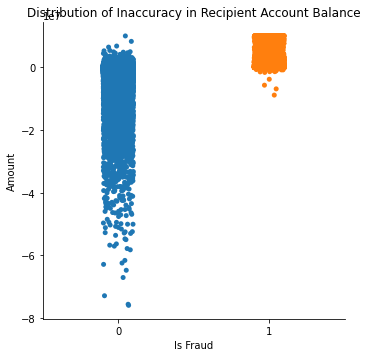

In [32]:
plt.rcParams["figure.figsize"] = (15,5)
sns.catplot(x='isFraud', y='Recipient_error',data=f_data)
plt.title('Distribution of Inaccuracy in Recipient Account Balance')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

In [33]:
f_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,originator_error,Recipient_error
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,-213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,-214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,-300850.89,-2401220.0


### Feature Scaling

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
f_data['type'] = le.fit_transform(f_data['type'])

In [36]:
X = f_data.drop('isFraud',axis=1)
y = f_data['isFraud']

In [37]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

In [38]:
scaled_X = msc.fit_transform(X)

In [39]:
scaled_X

array([[0.00000000e+00, 1.00000000e+00, 1.95790998e-06, ...,
        0.00000000e+00, 1.00000000e+00, 8.83568324e-01],
       [0.00000000e+00, 0.00000000e+00, 1.95790998e-06, ...,
        0.00000000e+00, 1.00000000e+00, 8.83814954e-01],
       [0.00000000e+00, 0.00000000e+00, 2.47858358e-03, ...,
        1.44627841e-04, 9.97687190e-01, 8.85693502e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 6.82716643e-02, ...,
        1.79120417e-02, 1.00000000e+00, 8.83566216e-01],
       [1.00000000e+00, 1.00000000e+00, 9.19463216e-03, ...,
        0.00000000e+00, 1.00000000e+00, 8.93463117e-01],
       [1.00000000e+00, 0.00000000e+00, 9.19463216e-03, ...,
        2.06640365e-02, 1.00000000e+00, 8.83566216e-01]])

In [40]:
y = y.astype('int')
y

2          1
3          1
15         0
19         0
24         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 2770409, dtype: int32

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=1)

In [43]:
lr = LogisticRegression(solver= "lbfgs", max_iter=1000)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
adc = AdaBoostClassifier()
cbc = CatBoostClassifier()
xgb = XGBClassifier()

In [44]:
models = [lr, dtc, rfc, svc, knn, adc, cbc, xgb]
model_name = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine',
              'K-Nearest Neighbour','AdaBoost Classifier','CatBoost Classifier','XGB Classifier']
mean_validation_f1_scores = []
for i in range(8):
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    target_names = ['class 0(Not Fraud)','class 1(Fraud)']
    print(f'\nModel Summary: {model_name[i]}\n')
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred))


Model Summary: Logistic Regression

                    precision    recall  f1-score   support

class 0(Not Fraud)       1.00      1.00      1.00    552423
    class 1(Fraud)       0.97      0.11      0.19      1659

          accuracy                           1.00    554082
         macro avg       0.98      0.55      0.60    554082
      weighted avg       1.00      1.00      1.00    554082

[[552417      6]
 [  1481    178]]

Model Summary: Decision Tree

                    precision    recall  f1-score   support

class 0(Not Fraud)       1.00      1.00      1.00    552423
    class 1(Fraud)       0.98      0.98      0.98      1659

          accuracy                           1.00    554082
         macro avg       0.99      0.99      0.99    554082
      weighted avg       1.00      1.00      1.00    554082

[[552396     27]
 [    26   1633]]

Model Summary: Random Forest

                    precision    recall  f1-score   support

class 0(Not Fraud)       1.00      1.00     